<a href="https://colab.research.google.com/github/Asdk22-eu/RI2025A/blob/main/Ejercicio_3_Representaci%C3%B3n_Gr%C3%A1fica_de_Vectores_de_Documentos_y_Consultas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nombre: Andrés Salvatore Suárez Herrera
Fecha: 12-05-2025

#Ejercicio 3: Representación Gráfica de Vectores de Documentos y Consultas
##Objetivo de la práctica


*   Comprender la representación de documentos y consultas en el modelo de espacio vectorial, mediante el cálculo de matrices término-documento usando medidas como TF y TF-IDF.
*   Aplicar la similitud coseno para comparar documentos con consultas, y utilizarla para recuperar y ordenar documentos según su relevancia.
* Visualizar de forma intuitiva los vectores de documentos y consultas, mediante reducción de dimensionalidad y representación gráfica en el plano, para facilitar la interpretación geométrica de la recuperación de información.





# Parte 1: Construcción de la matriz término-documento y TF-IDF
##Actividad
1. Usa el siguiente corpus de 4 documentos.
2. Vectoriza los documentos usando:
* Frecuencia absoluta (TF)
* TF-IDF
3. Visualiza los documentos como un gráfico de dispersión 2D y 3D.

In [17]:
#librerías necesarias para trabajar con las gráficas y pandas para la manipulación de datos
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [9]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
from mpl_toolkits.mplot3d import Axes3D

Matriz TF (Frecuencia absoluta):
   cama  cómoda  de  debajo  del  el  en  es  escondió  estaba  gato  \
0     1       0   1       1    0   1   0   0         1       0     1   
1     1       1   0       0    0   0   0   0         0       1     0   
2     0       0   0       0    0   3   1   0         0       0     1   
3     0       0   0       0    1   0   0   1         0       0     0   

   importante  jardín  jugaron  la  limpia  limpieza  perro  se  
0           0       0        0   1       0         0      0   1  
1           0       0        0   1       1         0      0   0  
2           0       1        1   0       0         0      1   0  
3           1       1        0   1       0         1      0   0  

Matriz TF-IDF:
       cama    cómoda        de    debajo       del        el        en  \
0  0.314806  0.000000  0.399292  0.399292  0.000000  0.314806  0.000000   
1  0.392784  0.498197  0.000000  0.000000  0.000000  0.000000  0.000000   
2  0.000000  0.000000  0.000000  0.

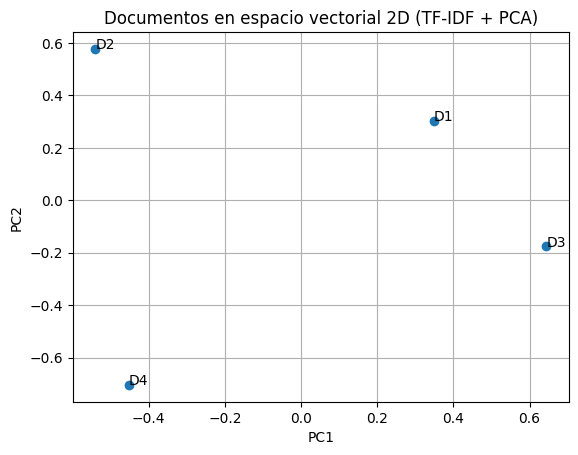

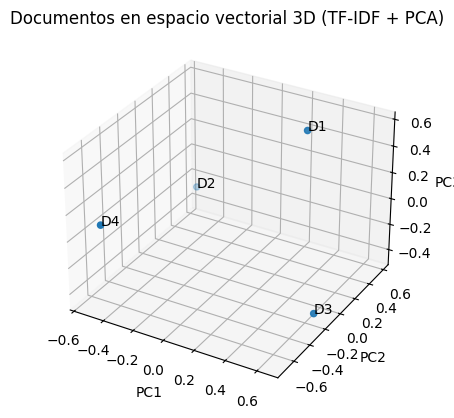

In [7]:

documents = [
    "El gato se escondió debajo de la cama.",
    "La cama estaba limpia y cómoda.",
    "El perro y el gato jugaron en el jardín.",
    "La limpieza del jardín es importante."
]
#Representación TF
cv = CountVectorizer()
X_tf = cv.fit_transform(documents)
df_tf = pd.DataFrame(X_tf.toarray(), columns=cv.get_feature_names_out())
print("Matriz TF (Frecuencia absoluta):")
print(df_tf)
#  Representación TF-IDF
tv = TfidfVectorizer()
X_tfidf = tv.fit_transform(documents)
df_tfidf = pd.DataFrame(X_tfidf.toarray(), columns=tv.get_feature_names_out())
print("\nMatriz TF-IDF:")
print(df_tfidf)
# Reducción PCA y visualización 2D
pca = PCA(n_components=2)
docs_2d = pca.fit_transform(X_tfidf.toarray())

plt.scatter(docs_2d[:,0], docs_2d[:,1])
for i, txt in enumerate(["D1", "D2", "D3", "D4"]):
    plt.annotate(txt, (docs_2d[i,0], docs_2d[i,1]))
plt.title("Documentos en espacio vectorial 2D (TF-IDF + PCA)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid()
plt.show()
# Reducción PCA y visualización 3D
pca3 = PCA(n_components=3)
docs_3d = pca3.fit_transform(X_tfidf.toarray())

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(docs_3d[:, 0], docs_3d[:, 1], docs_3d[:, 2])
for i, txt in enumerate(["D1", "D2", "D3", "D4"]):
    ax.text(docs_3d[i, 0], docs_3d[i, 1], docs_3d[i, 2], txt)
ax.set_title("Documentos en espacio vectorial 3D (TF-IDF + PCA)")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.show()

#Parte 2: Representación de la consulta como vector
##Actividad
1. Ingresa una consulta como texto.
2. Representa la consulta en el mismo espacio vectorial que los documentos.
3. Calcula similitud coseno entre la consulta y cada documento.
4. Visualiza la consulta como un vector en el mismo espacio vectorial que los documentos.

  Documento  Similitud Coseno
0        D1          0.219635
1        D2          0.000000
2        D3          0.895954
3        D4          0.122643


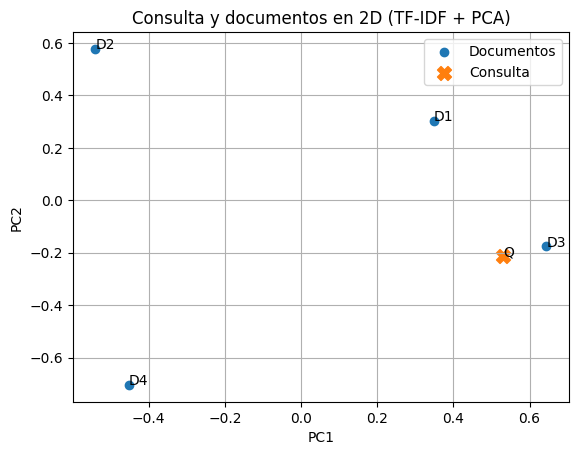

In [11]:
# Corpus original
documents = [
    "El gato se escondió debajo de la cama.",
    "La cama estaba limpia y cómoda.",
    "El perro y el gato jugaron en el jardín.",
    "La limpieza del jardín es importante."
]
# Vectorización TF-IDF
tv = TfidfVectorizer()
X_tfidf = tv.fit_transform(documents)
# PCA 2D en documentos
pca2 = PCA(n_components=2)
docs_2d = pca2.fit_transform(X_tfidf.toarray())

# Consulta de ejemplo
consulta = "El perro en el jardín"

# Vectorizar consulta
query_vec = tv.transform([consulta])

# Similitud coseno
similitudes = cosine_similarity(query_vec, X_tfidf).flatten()
df_sim = pd.DataFrame({
    "Documento": ["D1", "D2", "D3", "D4"],
    "Similitud Coseno": similitudes
})
print(df_sim)

# Proyección 2D de la consulta
query_2d = pca2.transform(query_vec.toarray())

# Gráfico 2D
plt.figure()
plt.scatter(docs_2d[:, 0], docs_2d[:, 1], label="Documentos")
plt.scatter(query_2d[:, 0], query_2d[:, 1], marker='X', s=100, label="Consulta")
for i, txt in enumerate(["D1","D2","D3","D4"]):
    plt.annotate(txt, (docs_2d[i,0], docs_2d[i,1]))
plt.annotate("Q", (query_2d[0,0], query_2d[0,1]))
plt.title("Consulta y documentos en 2D (TF-IDF + PCA)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid()
plt.legend()
plt.show()

#Parte 3: Consulta por similitud y ranking de documentos
##Actividad
1. Con la misma representación de vectores, implementar una función que devuelva los documentos más relevantes a una consulta usando similitud coseno.
2. Dibuja los vectores (de documentos y de consulta) como flechas desde el origen usando plt.quiver() o plt.arrow()

   Índice documento  Similitud Coseno
0                 2          0.875630
1                 0          0.342379
2                 3          0.127454
3                 1          0.000000


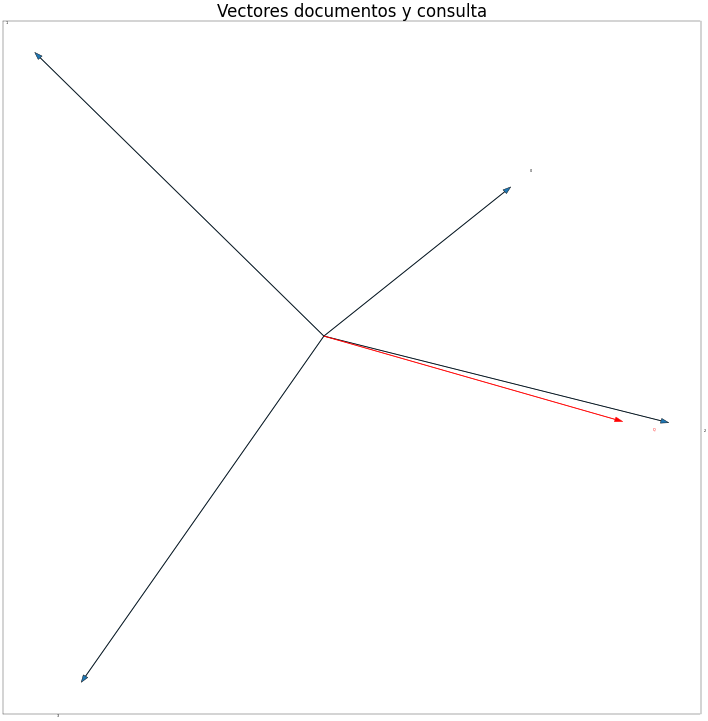

In [23]:
documents = [
    "El gato se escondió debajo de la cama.",
    "La cama estaba limpia y cómoda.",
    "El perro y el gato jugaron en el jardín.",
    "La limpieza del jardín es importante."
]
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(documents)
# Ranking por similitud coseno
def rank_documents(query, top_k=None):
    q_vec = vectorizer.transform([query])
    sims = cosine_similarity(q_vec, X_tfidf).flatten()
    order = np.argsort(sims)[::-1]
    if top_k:
        order = order[:top_k]
    return [(idx, sims[idx]) for idx in order]

# Ejemplo de consulta
consulta = "El gato en el jardín"
ranking = rank_documents(consulta)

# Mostrar ranking
df_ranking = pd.DataFrame(ranking, columns=["Índice documento", "Similitud Coseno"])
print(df_ranking)

# PCA 2D para vectores
pca = PCA(n_components=2)
points_2d = pca.fit_transform(X_tfidf.toarray())
query_2d = pca.transform(vectorizer.transform([consulta]).toarray())

# Gráfico simplificado con flechas
plt.figure(figsize=(30, 30), dpi=30)
origin = np.array([0, 0])
for idx, _ in ranking:
    vec = points_2d[idx]
    plt.arrow(0, 0, vec[0], vec[1], head_width=0.01, length_includes_head=True)
    plt.text(vec[0]*1.1, vec[1]*1.1, str(idx), fontsize=8)

# Flecha de la consulta en rojo
qv = query_2d[0]
plt.arrow(0, 0, qv[0], qv[1], head_width=0.01, length_includes_head=True, color='red')
plt.text(qv[0]*1.1, qv[1]*1.1, 'Q', color='red', fontsize=8)

plt.title("Vectores documentos y consulta", fontsize=40)
plt.xticks([], [])
plt.yticks([], [])
plt.show()